## Data Science Intern Challenge
### Question 1:
Given some sample data, write a program to answer the following: [click here](https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0) to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

**a.** Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

In [1]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('./Shopify 2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [5]:
#checking the features and data given

df.head()

order_id  shop_id  user_id  order_amount  total_items payment_method  \
0         1       53      746           224            2           cash   
1         2       92      925            90            1           cash   
2         3       44      861           144            1           cash   
3         4       18      935           156            1    credit_card   
4         5       18      883           156            1    credit_card   

            created_at  
0  2017-03-13 12:36:56  
1  2017-03-03 17:38:52  
2   2017-03-14 4:23:56  
3  2017-03-26 12:43:37  
4   2017-03-01 4:35:11

In [10]:
#how much data and checking for null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [22]:
#Exploring the cost of a pair of sneakers per order
df['order_cost']=df['order_amount']/df['total_items']
df['order_cost'].describe()

count     5000.000000
mean       387.742800
std       2441.963725
min         90.000000
25%        133.000000
50%        153.000000
75%        169.000000
max      25725.000000
Name: order_cost, dtype: float64

In [13]:
#Understanding where the Average Order Value of #3145.13 came from. Confirms my assumption of using the mean value of the order_amount was used.

df.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

In [12]:
#Exploring the number of items ordered

df['total_items'].value_counts()

2       1832
1       1830
3        941
4        293
5         77
2000      17
6          9
8          1
Name: total_items, dtype: int64

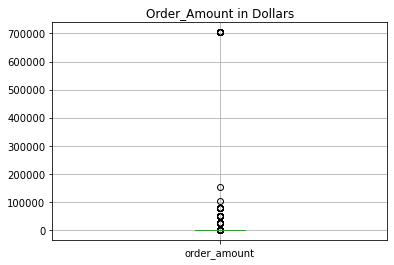

In [16]:
#The total_items shows some outlier amount so displaying the order_amount to see the distribution

df.boxplot(column='order_amount').set_title('Order_Amount in Dollars');

Above boxplot shows plenty of outliers on order_amount. As expected based on the order_amount.describe() table, Q1-Q3 of IQR of the data is within 390.00 and with a maximum order amount of 704000.00. Since there are orders with very high order_amount, I'm assuming this are commercial purchase and this can pull the AOV into a higher amount. It shows a standard deviation that's high. The outliers from the boxplot shown above needs extra checking to see why this orders are high.

In [27]:
#Exploring the outliers of order_amount by grouping by size then make it descending then view the first 10 biggest order_amount with the count or orders.
amounts = df.groupby(['order_amount']).size().reset_index(name ='count').sort_values(by ='order_amount', ascending=False)
amounts.head(10)

order_amount  count
257        704000     17
256        154350      1
255        102900      1
254         77175      9
253         51450     16
252         25725     19
251          1760      1
250          1408      2
249          1086      1
248          1064      1

It seems like some of the large orders are repeated. Exploring these orders more to see if my previous assumption of these being commercial orders are correct.

In [35]:
df_explore= df.loc[df['order_amount'].isin([704000, 77175, 51450, 25725, 1408])].sort_values(by='order_amount', ascending=False)
df_explore[(df_explore['order_amount']==704000)].sort_values(by='created_at')

order_id  shop_id  user_id  order_amount  total_items payment_method  \
4646      4647       42      607        704000         2000    credit_card   
520        521       42      607        704000         2000    credit_card   
60          61       42      607        704000         2000    credit_card   
15          16       42      607        704000         2000    credit_card   
2297      2298       42      607        704000         2000    credit_card   
1436      1437       42      607        704000         2000    credit_card   
2153      2154       42      607        704000         2000    credit_card   
1362      1363       42      607        704000         2000    credit_card   
1602      1603       42      607        704000         2000    credit_card   
1562      1563       42      607        704000         2000    credit_card   
4868      4869       42      607        704000         2000    credit_card   
1104      1105       42      607        704000         2000    credit_card   
3332      3333       42      607        704000         2000    credit_card   
4882      4883       42      607        704000         2000    credit_card   
2969      2970       42      607        704000         2000    credit_card   
2835      2836       42      607        704000         2000    credit_card   
4056      4057       42      607        704000         2000    credit_card   

              created_at  order_cost  
4646  2017-03-02 4:00:00       352.0  
520   2017-03-02 4:00:00       352.0  
60    2017-03-04 4:00:00       352.0  
15    2017-03-07 4:00:00       352.0  
2297  2017-03-07 4:00:00       352.0  
1436  2017-03-11 4:00:00       352.0  
2153  2017-03-12 4:00:00       352.0  
1362  2017-03-15 4:00:00       352.0  
1602  2017-03-17 4:00:00       352.0  
1562  2017-03-19 4:00:00       352.0  
4868  2017-03-22 4:00:00       352.0  
1104  2017-03-24 4:00:00       352.0  
3332  2017-03-24 4:00:00       352.0  
4882  2017-03-25 4:00:00       352.0  
2969  2017-03-28 4:00:00       352.0  
2835  2017-03-28 4:00:00       352.0  
4056  2017-03-28 4:00:00       352.0

Interesting as I see some the largest order_amount of 704000 comes from the same shop and it seems like it's ordered by the same user_id and within just a few days and all are paid by same method.

In [36]:
df_explore[(df_explore['order_amount']==77175)].sort_values(by='created_at')

order_id  shop_id  user_id  order_amount  total_items payment_method  \
4715      4716       78      818         77175            3          debit   
4420      4421       78      969         77175            3          debit   
3724      3725       78      766         77175            3    credit_card   
2906      2907       78      817         77175            3          debit   
3403      3404       78      928         77175            3          debit   
4192      4193       78      787         77175            3    credit_card   
2690      2691       78      962         77175            3          debit   
2564      2565       78      915         77175            3          debit   
1259      1260       78      775         77175            3    credit_card   

               created_at  order_cost  
4715   2017-03-05 5:10:44     25725.0  
4420  2017-03-09 15:21:35     25725.0  
3724  2017-03-16 14:13:26     25725.0  
2906   2017-03-16 3:45:46     25725.0  
3403   2017-03-16 9:45:05     25725.0  
4192   2017-03-18 9:25:32     25725.0  
2690   2017-03-22 7:33:25     25725.0  
2564   2017-03-25 1:19:35     25725.0  
1259   2017-03-27 9:27:20     25725.0

The order_amount of 77175 is interesting as well as it suggests that the cost/item is 25725 which is quiet high for a pair of sneakers! It also comes from the same shop however these are purchases of different users_ids.

In [37]:
df_explore[(df_explore['order_amount']==51450)].sort_values(by='created_at')

order_id  shop_id  user_id  order_amount  total_items payment_method  \
4311      4312       78      960         51450            2          debit   
2821      2822       78      814         51450            2           cash   
4412      4413       78      756         51450            2          debit   
511        512       78      967         51450            2           cash   
3167      3168       78      927         51450            2           cash   
3705      3706       78      828         51450            2    credit_card   
493        494       78      983         51450            2           cash   
2818      2819       78      869         51450            2          debit   
617        618       78      760         51450            2           cash   
2512      2513       78      935         51450            2          debit   
4079      4080       78      946         51450            2           cash   
3101      3102       78      855         51450            2    credit_card   
490        491       78      936         51450            2          debit   
2495      2496       78      707         51450            2           cash   
2452      2453       78      709         51450            2           cash   
1529      1530       78      810         51450            2           cash   

               created_at  order_cost  
4311   2017-03-01 3:02:10     25725.0  
2821  2017-03-02 17:13:25     25725.0  
4412   2017-03-02 4:13:39     25725.0  
511    2017-03-09 7:23:14     25725.0  
3167  2017-03-12 12:23:08     25725.0  
3705  2017-03-14 20:43:15     25725.0  
493   2017-03-16 21:39:35     25725.0  
2818   2017-03-17 6:25:51     25725.0  
617   2017-03-18 11:18:42     25725.0  
2512  2017-03-18 18:57:13     25725.0  
4079  2017-03-20 21:14:00     25725.0  
3101   2017-03-21 5:10:34     25725.0  
490   2017-03-26 17:08:19     25725.0  
2495   2017-03-26 4:38:52     25725.0  
2452  2017-03-27 11:04:04     25725.0  
1529   2017-03-29 7:12:01     25725.0

This is looking a bit similar to the previous one, but now with just 2 total items instead of 3. 

In [39]:
df_explore[(df_explore['order_amount']==25725)].sort_values(by='created_at')

order_id  shop_id  user_id  order_amount  total_items payment_method  \
4040      4041       78      852         25725            1           cash   
3780      3781       78      889         25725            1           cash   
2922      2923       78      740         25725            1          debit   
160        161       78      990         25725            1    credit_card   
2270      2271       78      855         25725            1    credit_card   
1056      1057       78      800         25725            1          debit   
4918      4919       78      823         25725            1           cash   
1193      1194       78      944         25725            1          debit   
1384      1385       78      867         25725            1           cash   
1452      1453       78      812         25725            1    credit_card   
2548      2549       78      861         25725            1           cash   
1204      1205       78      970         25725            1    credit_card   
3151      3152       78      745         25725            1    credit_card   
3440      3441       78      982         25725            1          debit   
4505      4506       78      866         25725            1          debit   
4584      4585       78      997         25725            1           cash   
2773      2774       78      890         25725            1           cash   
3085      3086       78      910         25725            1           cash   
1419      1420       78      912         25725            1           cash   

               created_at  order_cost  
4040  2017-03-02 14:31:12     25725.0  
3780  2017-03-11 21:14:50     25725.0  
2922  2017-03-12 20:10:58     25725.0  
160    2017-03-12 5:56:57     25725.0  
2270  2017-03-14 23:58:22     25725.0  
1056  2017-03-15 10:16:45     25725.0  
4918  2017-03-15 13:26:46     25725.0  
1193  2017-03-16 16:38:26     25725.0  
1384  2017-03-17 16:38:06     25725.0  
1452  2017-03-17 18:09:54     25725.0  
2548  2017-03-17 19:36:00     25725.0  
1204  2017-03-17 22:32:21     25725.0  
3151  2017-03-18 13:13:07     25725.0  
3440  2017-03-19 19:02:54     25725.0  
4505  2017-03-22 22:06:01     25725.0  
4584  2017-03-25 21:48:44     25725.0  
2773  2017-03-26 10:36:43     25725.0  
3085   2017-03-26 1:59:27     25725.0  
1419  2017-03-30 12:23:43     25725.0

The 2nd-4th largest amount orders came from the same store with high item cost and very little total item. I can therefore assume that this shop 78 is more like a supplier with orders and might have a different item metric than the rest of the shopify stores. Since I'm assuming the largest order_amount are for commercial or suppliers, I should exclude them to get a better sense of retail transactions for the rest of the shopify stores.

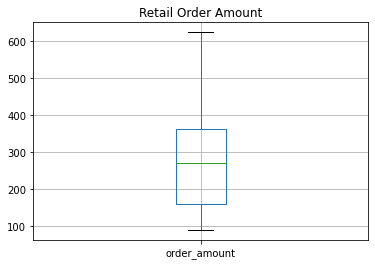

In [46]:
Q1 = df.order_amount.quantile(q=0.25)
Q2 = df.order_amount.quantile(q=0.5)
Q3 = df.order_amount.quantile(q=0.75)
IQR = Q3 - Q1

df_new = df[(df.order_amount <Q2 +IQR *1.5) & (df.order_amount >Q2 -IQR *1.5)]
df_new.boxplot(column='order_amount').set_title('Retail Order Amount');

In [47]:
df_new['order_amount'].describe()

count    4738.000000
mean      283.814268
std       132.061996
min        90.000000
25%       161.000000
50%       272.000000
75%       362.000000
max       624.000000
Name: order_amount, dtype: float64

#### This new dataframe (df_new) should provide a more accurate representation of retail order data.

**b.** What metric would you report for this dataset? 

Looking at the boxplot for df_new show that the distribution is skewed towards lower values, below 362. I would use median value or order_amount because the values above the median can increase the mean that might not be an accurate representation because of the imbalance on the distribution.

**c**. What is its value?

272 from the table above.

## Question 2: 
For this question you’ll need to use SQL. Follow this [link](https://www.w3schools.com/SQL/TRYSQL.ASP?FILENAME=TRYSQL_SELECT_ALL) to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.



**a.** How many orders were shipped by Speedy Express in total? **54**

In [ ]:
SELECT COUNT(*) 
FROM Orders
WHERE ShipperID =1;

**b.** What is the last name of the employee with the most orders? - The last name of the employee is Peacock with 40 orders.

In [ ]:
SELECT e.LastName, COUNT(*) AS num_orders
FROM Employees AS e JOIN Orders AS o ON o.EmployeeID = e.EmployeeID
GROUP BY e.LastName
ORDER BY num_orders DESC
LIMIT 1;

**c.** What product was ordered the most by customers in Germany? - Boston Crab Meat with total orders = 160.

In [ ]:
SELECT p.ProductID, p.productName, SUM(od.Quantity) AS total_quantity
FROM OrderDetails AS od JOIN Orders AS o ON o.OrderID = od.orderID
JOIN Products AS p ON od.productID = p.productID
JOIN Customers AS c ON c.CustomerID = o.CustomerID
WHERE c.Country = 'Germany'
GROUP BY p.productID
ORDER BY total_quantity DESC
LIMIT 1;